# CNN Model for Stock market Ratio Prediction

## Packages 

In [126]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers

##Removes warning for chained assignments
pd.options.mode.chained_assignment = None  # default='warn'

2022-09-01 18:07:30.337464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-01 18:07:30.337630: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Import Data


In [127]:
df = pd.read_excel('../raw_data/cleaned_data.xlsx').drop('Unnamed: 0',axis=1)
df.shape

(126, 231)

126 days of stock prices ratios for 231 different stock pairs, will build model to look at first ratio. 

## First Ratio

In [128]:
A = df[['Date','BBWI_COO']]
A.set_index('Date',inplace=True)
A.rename(columns = {'BBWI_COO': 'Ratio'},inplace=True)
A

,Ratio
Date,
2022-02-28,0.129193
2022-03-01,0.122627
2022-03-02,0.127060
2022-03-03,0.123758
2022-03-04,0.116190
...,...
2022-08-22,0.116055
2022-08-23,0.117660
2022-08-24,0.119299


### Feature engineering 

The CNN model can be used to model the ratios but we first have to pre-process the data into a format the model will understand this consists of a series of smaller samples for this I will start with using the Monday to Friday 

In [129]:
# Create columns for previous week Ratio Column is now the target.

for i in range(1,6):
    A[f't-{i}'] = A['Ratio'].shift(i)
A = A.dropna()
A

,Ratio,t-1,t-2,t-3,t-4,t-5
Date,,,,,,
2022-03-07,0.112286,0.116190,0.123758,0.127060,0.122627,0.129193
2022-03-08,0.118666,0.112286,0.116190,0.123758,0.127060,0.122627
2022-03-09,0.122097,0.118666,0.112286,0.116190,0.123758,0.127060
2022-03-10,0.123552,0.122097,0.118666,0.112286,0.116190,0.123758
2022-03-11,0.121979,0.123552,0.122097,0.118666,0.112286,0.116190
...,...,...,...,...,...,...
2022-08-22,0.116055,0.119805,0.123131,0.122132,0.121021,0.117015
2022-08-23,0.117660,0.116055,0.119805,0.123131,0.122132,0.121021
2022-08-24,0.119299,0.117660,0.116055,0.119805,0.123131,0.122132


In [134]:
X = []
for i in range(len(A['Ratio'])):
    X.append([A['t-5'][i],A['t-4'][i],A['t-3'][i],A['t-2'][i],A['t-1'][i]])
Y = A['Ratio'].tolist()
print(X[1],Y[1])

[0.1226267678495753, 0.1270597644622163, 0.1237582620043392, 0.1161903647427099, 0.1122857665900478] 0.1186657876147718


In [169]:
model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(5,1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mae')

In [170]:
X = array(X)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [171]:
Y = array(Y)

In [172]:
X.shape,Y.shape

((121, 5, 1), (121,))

In [173]:
X_train = X[0:100]
X_test = X[100:]
Y_train = Y[0:100]
Y_test = Y[100:]

In [174]:
X_train.shape,Y_train.shape

((100, 5, 1), (100,))

In [175]:
model.fit(X_train,Y_train, epochs=100, verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1222
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0841
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0544
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0276
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0203
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0117
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [178]:
X_test[1].shape

(5, 1)

In [199]:
preds = []
for i in range(len(X_test)):    
    pred = model.predict(X_test[i].reshape(1,5,1))
    preds.append(pred[0][0])
preds

1/1 [==============================] - 0s 17ms/step


[0.10535121,
 0.105921164,
 0.10809189,
 0.11020394,
 0.11254871,
 0.11495587,
 0.11538546,
 0.11440782,
 0.113369405,
 0.111820266,
 0.112945884,
 0.11506809,
 0.115738794,
 0.117309526,
 0.11881623,
 0.11955123,
 0.12033337,
 0.11994526,
 0.11800967,
 0.117779136,
 0.11763893]

In [200]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [201]:
mape = []
for i in range(len(preds)):
    mape.append(mean_absolute_percentage_error(Y_test[i],preds[i]))
mape

[2.5850341649529383,
 7.18862779393393,
 4.689243935184518,
 7.267795286301711,
 3.6677836761369154,
 2.326953598131592,
 0.971455115068689,
 3.884601665221173,
 1.3746384725597982,
 5.854430678802826,
 5.177295158636417,
 1.6640973084041804,
 4.365001571345668,
 3.9486246070550512,
 3.5038663298606068,
 0.21214246674527804,
 3.6865420279048267,
 1.9420078617065735,
 1.0806900263107135,
 2.4883165204734157,
 5.27239533428591]

In [202]:
sum(mape)/len(mape)

3.4834068380487015

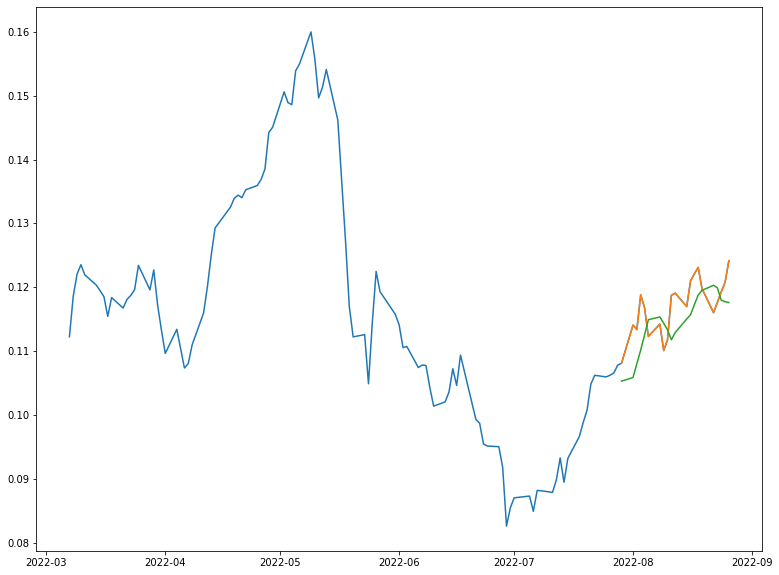

In [238]:
fig, ax = plt.subplots(1,1,figsize = (13,10))
ax.plot(A['Ratio'[0:100]])
ax.plot(A.index[-21:],Y_test)
ax.plot(A.index[-21:],preds)

In [234]:
preds

0     0.105351
1     0.105921
2     0.108092
3     0.110204
4     0.112549
5     0.114956
6     0.115385
7     0.114408
8     0.113369
9     0.111820
10    0.112946
11    0.115068
12    0.115739
13    0.117310
14    0.118816
15    0.119551
16    0.120333
17    0.119945
18    0.118010
19    0.117779
20    0.117639
dtype: float32

(21,)